### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2019
---

## Midterm 

## Title: Machine Learning from Disaster

## Name: Hong Son

#### Date: 6/4/2019


# EDA

In this section, I will look at the data and look at where values are NA in the age column.

In [47]:
# import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
# Read in test data and see how many rows and columns
test = pd.read_csv("test.csv")
test_shape = test.shape
print(test_shape)


(418, 11)


In [49]:
# Read in Training data
titanic = pd.read_csv('train.csv')
#Look at # of rows and cols
titanic_shape = titanic.shape
print("There are " + str(titanic_shape[0]) + " rows and " + str(titanic_shape[1]) + " columns")

There are 891 rows and 12 columns


In [50]:
#Take a look at first 10 rows
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
# See how much male and females in the training data
titantic_male = titanic[titanic['Sex'] == 'male'].Sex.count()
titantic_female = titanic[titanic['Sex'] == 'female'].Sex.count()

print("There are " + str(titantic_male) + " males and " + str(titantic_female) + " females")

There are 577 males and 314 females


In [53]:
# Check how the # of na of Age in training dataset
titanic.Age.isna().sum()


177

In [54]:
# Check how the # of na of Age in testing dataset
test.Age.isna().sum()


86

In [55]:
# There is 1 row that Fare is na in test data. Set that to the mean of the Fares
test.Fare.isna().sum()
test.loc[152,'Fare'] = test.Fare.mean()

# Data Cleansing

* Hypothesis : I believe that the fares could be an important indicator so I created bins to the store them. Maybe the more expensive fares offer more safety and vice versa for the least expensive fare.

In [56]:
# create 5 bins that indent by 7 and that groups based on fares.
fare_group = []
for t in titanic['Fare']:
    if t >= 0 and t <= 7:
        fare_group.append(1)
    if t > 7 and t <= 14:
        fare_group.append(2)
    if t > 14 and t <= 21:
        fare_group.append(3)
    if t >21 and t <= 28:
        fare_group.append(4)
    if t > 28:
        fare_group.append(5)

# Do the same for the test dataset
test_fare_group = []
for t in test['Fare']:
    if t >= 0 and t <= 7:
        test_fare_group.append(1)
    if t > 7 and t <= 14:
        test_fare_group.append(2)
    if t > 14 and t <= 21:
        test_fare_group.append(3)
    if t >21 and t <= 28:
        test_fare_group.append(4)
    if t > 28:
        test_fare_group.append(5)

# Create and set the values on the dataframes
test['Fare_group'] = test_fare_group
titanic['Fare_group'] = fare_group

In [57]:
# Look at the first 5 rows of training where Age is nan
titanic[titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,2
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,2
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,2


In [58]:
# Same for test
test[test['Age'].isna()].head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,2
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,5
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,4
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,2


In [59]:
# Convert Pclass + Fare_group to string
titanic['Pclass'] = titanic['Pclass'].apply(str)
titanic['Fare_group'] = titanic['Fare_group'].apply(str)
# Concatenate the sex + Pclass + Faregroup together
titanic["SPClassFare"] = titanic['Sex'] + titanic['Pclass'] + titanic['Fare_group']

test['Pclass'] = test['Pclass'].apply(str)
test['Fare_group'] = test['Fare_group'].apply(str)
test["SPClassFare"] = test['Sex'] + test['Pclass'] + test['Fare_group']


In [60]:
# Take a look at first 5 rows
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,SPClassFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,male32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,female15
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,female32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,female15
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,male32


In [61]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,SPClassFare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,male32
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,female31
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2,male22
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,male32
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,female32


In [62]:
# Group the ages and take mean of the ages
age_group = titanic.groupby('SPClassFare').Age.mean()

test_age_group = test.groupby('SPClassFare').Age.mean()
test_age_group

SPClassFare
female14    46.833333
female15    40.547619
female22    24.166667
female23    23.400000
female24    24.435556
female25    25.000000
female31    38.500000
female32    23.750000
female33    19.197273
female34    26.000000
female35    16.000000
male11      49.000000
male14      38.850000
male15      40.730769
male22      31.132353
male23      36.500000
male24      33.666667
male25      24.500000
male31      15.000000
male32      25.261690
male33      21.383000
male34      23.200000
male35      25.125000
Name: Age, dtype: float64

In [63]:
age_group


SPClassFare
female14    43.600000
female15    34.050000
female22    32.053571
female23    32.111111
female24    26.807692
female25    22.000000
female31    18.000000
female32    22.088235
female33    22.481481
female34    15.555556
female35    23.357143
male11      37.500000
male14      46.050000
male15      40.239221
male21            NaN
male22      33.709091
male23      21.437500
male24      33.119048
male25      21.488667
male31      33.115385
male32      28.153407
male33      24.428571
male34      22.875000
male35      12.954545
Name: Age, dtype: float64

In [64]:
#There's one nan value so take the group male group 2 mean
male21_val = (33.709091 + 21.437500 + 33.119048 + 21.488667) / 4

age_group[14] = male21_val

In [65]:
# Create the value_counts to dataframes to store the values
titanic_age_group_df = pd.DataFrame(data = age_group)
test_age_group_df = pd.DataFrame(data = test_age_group)

In [66]:
# set the titanic_ageNA to the rows where age is na 
# and get cols PassengerId, SPClassFare
titanic_ageNA = titanic[titanic['Age'].isna()]
titanic_ageNA = titanic_ageNA[['PassengerId','SPClassFare']]

# same for test_age_NA
test_ageNA = test[test['Age'].isna()]
test_ageNA = test[['PassengerId','SPClassFare']]

In [67]:
# We have a help function age_fill that get the SPClassFare field and match it to the age_group_df to set the Age values

age = []
age2 = []

#Goes through the NA and set the values and append to the arrays
def age_fill():
    for sp in titanic_ageNA['SPClassFare']:
        age.append(titanic_age_group_df[titanic_age_group_df.index == sp].Age)
    for sp in test_ageNA['SPClassFare']:
        age2.append(test_age_group_df[test_age_group_df.index == sp].Age)

age_fill()

In [68]:
#age2

In [69]:
test_ageNA.shape

(418, 2)

In [70]:
len(age2)

418

In [71]:
# create the columns with the age values of the NA
titanic_ageNA['Age'] = age
test_ageNA['Age'] = age2

/Users/Hong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,SPClassFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,male32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,female15
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,female32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,female15
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,male32


In [73]:
# Left merge to keep things from the original train and test datasets
df = titanic.merge(titanic_ageNA, on=['PassengerId', 'PassengerId'], how='left')
df2 = test.merge(test_ageNA, on=['PassengerId', 'PassengerId'], how='left')

In [74]:
# Fill in the na values 
df.Age_x = df['Age_x'].fillna(df['Age_y'])
df2.Age_x = df2['Age_x'].fillna(df2['Age_y'])


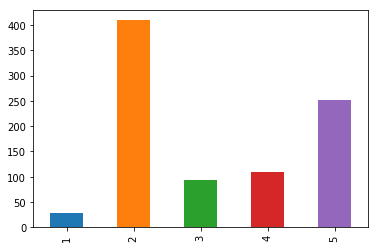

In [75]:
# See what Fare_group the passengers are on 
df.Fare_group.value_counts().sort_index().plot.bar()

In [76]:
df.pivot_table(index="Fare_group",values="Survived")


,Survived
Fare_group,
1,0.071429
2,0.266504
3,0.408602
4,0.449541
5,0.571429


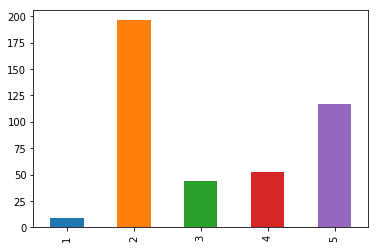

In [77]:
df2.Fare_group.value_counts().sort_index().plot.bar()

# Prepare Data For Logistic Regression 

In this section, I created dummies for the columns we need so the columns would contains values 0 or 1.

In [78]:
# This funct splits into columns with val of 0s and 1s (short to wide)
def dummies_funct(df,column):
    dummies = pd.get_dummies(df[column],prefix=column)
    df = pd.concat([df,dummies],axis=1)
    return df


In [79]:
# Run it on columns we need
train = dummies_funct(df,"Pclass")
test = dummies_funct(test,"Pclass")

train = dummies_funct(train,"Sex")
test = dummies_funct(test,"Sex")

train = dummies_funct(train,"Fare_group")
test = dummies_funct(test,"Fare_group")


# Logistic Regression

Logistic regression is used for prediction in which output is binary which in our case, survived is either 0 or 1 so that why I chose I chose to use the Logistic Regression ML model. I will train the model use the important columns (Sex, PClass, and Fare Group) to predict if the person survived or not.

In [80]:
from sklearn.linear_model import LogisticRegression


In [81]:
# Create the Log. Regression object and fit using our training data
column = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Fare_group_1', 'Fare_group_2', 'Fare_group_3', 'Fare_group_4', 'Fare_group_5']

lr = LogisticRegression(solver='lbfgs')

# fit using the columns specified in column
lr.fit(train[column], train['Survived'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
from sklearn.model_selection import train_test_split

column = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Fare_group_1', 'Fare_group_2', 'Fare_group_3', 'Fare_group_4', 'Fare_group_5']

all_X = train[column]
all_y = train['Survived']

# Test size is 20% of the data, 80% of the data was used to train the model
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [83]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
# predict the Survived 
predictions = lr.predict(test_X)


In [84]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
# Check the accuracy that our model predict.
accuracy = accuracy_score(test_y, predictions)
accuracy


0.7932960893854749

We got ~79% accuracy for predicting the people who survived using our model.

In [85]:
column = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Fare_group_1', 'Fare_group_2', 'Fare_group_3', 'Fare_group_4', 'Fare_group_5']

test = test.loc[:,~test.T.duplicated(keep='first')]


In [86]:

lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)

test_predictions = lr.predict(test[column])
test_predictions


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
test_pass_id = test["PassengerId"]
submission_df = {"PassengerId": test_pass_id,
                 "Survived": test_predictions}
prediction = pd.DataFrame(submission_df)

prediction.to_csv('titanic_submission.csv', index=False)


When I submitted my prediction, I got a score of ~75% and it was above 2161 submission so not too bad. The 100% that people on the page are probably outliers and I think no model can be 100% accurate. 